In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import numpy as np
import utils
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [4]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [5]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X,_ = Preprocessing.scale_data(X)
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

#áp dụng smote
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm, y_train_sm = Preprocessing.apply_smote(X_train_sm, y_train_sm)

In [7]:
# Preprocessing.plot_heatmap(X_train_sm[list['Feature']], y_train_sm,'Attack_type')

In [8]:
# Preprocessing.plot_heatmap(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train,'Attack_type')

Train với dữ liệu chưa giảm chiều

In [9]:
# x2 = X_train[list['Feature']].drop(dropped_columns, axis=1)

In [10]:
# print(len(X_train.columns))

In [11]:
model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
y_pred = model_LinearSVC.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1500
           1       0.99      0.77      0.87       128
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.67      0.18      0.29        22
           5       0.67      0.40      0.50         5
           6       1.00      0.99      0.99       397
           7       1.00      1.00      1.00       220
           8       0.85      0.97      0.91       429
           9       0.99      0.99      0.99       386
          10       0.95      0.92      0.94      1686
          11       0.84      0.59      0.70        83

    accuracy                           0.99     24624
   macro avg       0.90      0.81      0.84     24624
weighted avg       0.99      0.99      0.99     24624

Confusion Matrix:
 [[ 1406     1     0     2     2     1     0     0    45     3    39     1]
 [    4    99  

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
y_pred = model_xgboost.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [09:19:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      1.00      0.99       485
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1624
          11       0.97      1.00      0.98        56

    accuracy                           1.00     24624
   macro avg       0.95      0.96      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1569     0     0     0     0     1     0     0     3     2    12     1]
 [    0   100  

In [13]:
model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_sm)
y_pred = model_logistic_regression.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1440
           1       0.99      0.73      0.84       135
           2       1.00      1.00      1.00     18897
           3       1.00      0.99      1.00       877
           4       0.83      0.09      0.16        56
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.87      0.84      0.85       503
           9       0.99      1.00      1.00       381
          10       0.94      0.94      0.94      1629
          11       0.91      0.60      0.73        88

    accuracy                           0.98     24624
   macro avg       0.92      0.79      0.83     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1354     0     0     1     1     1     0     0    36     2    43     2]
 [   11    99  

In [14]:
model_knn = model.model_knn(X_train_sm, y_train_sm)
y_pred = model_knn.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1585
           1       0.97      0.98      0.97        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.45      0.59        11
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00       394
           7       1.00      1.00      1.00       220
           8       0.98      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.98      0.98      0.98      1622
          11       0.91      0.98      0.95        54

    accuracy                           1.00     24624
   macro avg       0.94      0.90      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1547     2     0     1     0     1     0     0     4     2    26     2]
 [    1    97  

In [15]:
model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.96      0.98      0.97        98
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       873
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1618
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     1     0     0     0     0     4     2    17     2]
 [    0    96  

In [16]:
model_mlp = model.model_mlp(X_train_sm, y_train_sm, input_size=X_train_sm.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=1000)
y_pred = model.predict_mlp(model_mlp, X_test_sm)
utils.report(y_pred, y_test_sm)

Đang huấn luyện trên: cuda
Epoch [1/1000], Loss: 2.4933
Epoch [10/1000], Loss: 2.3218
Epoch [20/1000], Loss: 2.0140
Epoch [30/1000], Loss: 1.6389
Epoch [40/1000], Loss: 1.2866
Epoch [50/1000], Loss: 1.0386
Epoch [60/1000], Loss: 0.8725
Epoch [70/1000], Loss: 0.7485
Epoch [80/1000], Loss: 0.6444
Epoch [90/1000], Loss: 0.5673
Epoch [100/1000], Loss: 0.4830
Epoch [110/1000], Loss: 0.4185
Epoch [120/1000], Loss: 0.3709
Epoch [130/1000], Loss: 0.3361
Epoch [140/1000], Loss: 0.3139
Epoch [150/1000], Loss: 0.3003
Epoch [160/1000], Loss: 0.2836
Epoch [170/1000], Loss: 0.2674
Epoch [180/1000], Loss: 0.2629
Epoch [190/1000], Loss: 0.2520
Epoch [200/1000], Loss: 0.2385
Epoch [210/1000], Loss: 0.2317
Epoch [220/1000], Loss: 0.2226
Epoch [230/1000], Loss: 0.2146
Epoch [240/1000], Loss: 0.2057
Epoch [250/1000], Loss: 0.1998
Epoch [260/1000], Loss: 0.1978
Epoch [270/1000], Loss: 0.1859
Epoch [280/1000], Loss: 0.1882
Epoch [290/1000], Loss: 0.1842
Epoch [300/1000], Loss: 0.1790
Epoch [310/1000], Loss:

Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


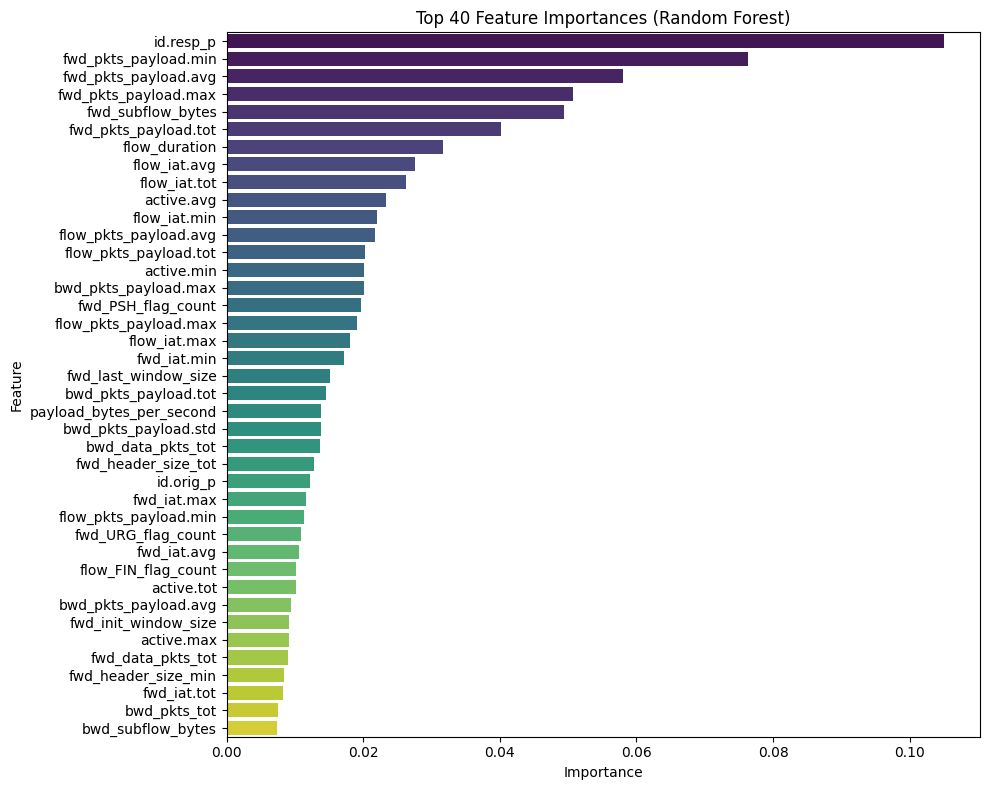

In [17]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [18]:
X_train_sm = X_train_sm[list['Feature']]
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['flow_iat.max', 'bwd_pkts_payload.tot', 'flow_iat.tot', 'bwd_subflow_bytes', 'flow_pkts_payload.max', 'fwd_data_pkts_tot', 'fwd_iat.max', 'bwd_pkts_payload.std', 'bwd_pkts_tot', 'fwd_iat.avg', 'fwd_pkts_payload.avg', 'fwd_iat.tot', 'bwd_pkts_payload.avg', 'active.min', 'active.max', 'bwd_data_pkts_tot']


In [19]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

In [20]:
model_LinearSVC_dr = model.model_LinearSVC(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_LinearSVC_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66      1957
           1       0.97      0.63      0.76       154
           2       1.00      1.00      1.00     18900
           3       0.99      1.00      0.99       866
           4       0.83      0.09      0.17        53
           5       0.67      0.40      0.50         5
           6       1.00      0.99      1.00       396
           7       1.00      0.92      0.96       238
           8       0.87      0.69      0.77       616
           9       0.99      1.00      0.99       382
          10       0.52      0.87      0.65       975
          11       0.66      0.46      0.54        82

    accuracy                           0.95     24624
   macro avg       0.85      0.72      0.75     24624
weighted avg       0.96      0.95      0.95     24624

Confusion Matrix:
 [[ 1169     0     0     6     1     1     0     0    35     2   733    10]
 [   28    97  

In [21]:
model_xgboost_dr = model.model_xgboost(X_train_sm_dr, y_train_sm_dr,12)
y_pred_dr = model_xgboost_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [09:22:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1596
           1       1.00      0.99      1.00       101
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       870
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       485
           9       0.99      1.00      1.00       381
          10       0.99      1.00      0.99      1615
          11       0.98      1.00      0.99        57

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.97     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1572     0     0     0     0     1     0     0     3     2    18     0]
 [    0   100  

In [22]:
model_logistic_regression_dr = model.model_logistic_regression(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_logistic_regression_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1367
           1       1.00      0.58      0.74       171
           2       1.00      1.00      1.00     18901
           3       1.00      0.99      1.00       873
           4       0.83      0.09      0.16        58
           5       0.67      0.33      0.44         6
           6       1.00      0.99      1.00       395
           7       1.00      0.92      0.96       239
           8       0.87      0.70      0.78       604
           9       0.99      1.00      1.00       381
          10       0.89      0.95      0.92      1530
          11       0.79      0.46      0.59        99

    accuracy                           0.97     24624
   macro avg       0.90      0.74      0.78     24624
weighted avg       0.98      0.97      0.97     24624

Confusion Matrix:
 [[ 1194     0     0     1     1     1     0     0    36     2   128     4]
 [   38   100  

In [23]:
model_knn_dr = model.model_knn(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_knn_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1593
           1       0.98      0.99      0.98        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       870
           4       0.83      0.38      0.53        13
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       394
           7       1.00      0.99      0.99       222
           8       0.98      0.99      0.99       484
           9       0.99      1.00      1.00       381
          10       0.98      0.99      0.98      1612
          11       0.91      0.95      0.93        56

    accuracy                           1.00     24624
   macro avg       0.94      0.91      0.92     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1551     2     0     1     0     1     0     1     3     2    30     2]
 [    1    98  

In [24]:
model_random_forest_dr = model.model_random_forest(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_random_forest_dr.predict(X_test_sm_dr)
utils.report(y_pred_dr,y_test_sm_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1601
           1       0.97      1.00      0.98        97
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       490
           9       0.99      1.00      1.00       381
          10       0.99      1.00      0.99      1609
          11       0.95      0.96      0.96        57

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1570     2     0     0     0     0     0     0     4     2    21     2]
 [    0    97  

In [25]:
model_mlp_dr = model.model_mlp(X_train_sm_dr, y_train_sm_dr, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=1000)



Đang huấn luyện trên: cuda
Epoch [1/1000], Loss: 2.4892
Epoch [10/1000], Loss: 2.3431
Epoch [20/1000], Loss: 2.1109
Epoch [30/1000], Loss: 1.8236
Epoch [40/1000], Loss: 1.5423
Epoch [50/1000], Loss: 1.2752
Epoch [60/1000], Loss: 1.0725
Epoch [70/1000], Loss: 0.9028
Epoch [80/1000], Loss: 0.7773
Epoch [90/1000], Loss: 0.6731
Epoch [100/1000], Loss: 0.6083
Epoch [110/1000], Loss: 0.5540
Epoch [120/1000], Loss: 0.5222
Epoch [130/1000], Loss: 0.4931
Epoch [140/1000], Loss: 0.4644
Epoch [150/1000], Loss: 0.4458
Epoch [160/1000], Loss: 0.4247
Epoch [170/1000], Loss: 0.3958
Epoch [180/1000], Loss: 0.3883
Epoch [190/1000], Loss: 0.3729
Epoch [200/1000], Loss: 0.3630
Epoch [210/1000], Loss: 0.3565
Epoch [220/1000], Loss: 0.3448
Epoch [230/1000], Loss: 0.3350
Epoch [240/1000], Loss: 0.3268
Epoch [250/1000], Loss: 0.3178
Epoch [260/1000], Loss: 0.3119
Epoch [270/1000], Loss: 0.3074
Epoch [280/1000], Loss: 0.3004
Epoch [290/1000], Loss: 0.2953
Epoch [300/1000], Loss: 0.2855
Epoch [310/1000], Loss:

In [26]:
y_pred_dr = model.predict_mlp(model_mlp_dr, X_test_sm_dr)
utils.report(y_pred_dr, y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1484
           1       0.99      0.59      0.74       169
           2       1.00      1.00      1.00     18900
           3       1.00      1.00      1.00       871
           4       0.83      0.11      0.20        44
           5       0.67      0.17      0.27        12
           6       1.00      0.99      1.00       396
           7       1.00      0.91      0.95       242
           8       0.87      0.96      0.91       439
           9       0.99      1.00      1.00       381
          10       0.91      0.93      0.92      1588
          11       0.88      0.52      0.65        98

    accuracy                           0.98     24624
   macro avg       0.91      0.76      0.79     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1327     1     0     1     1     1     0     0    37     2   113     1]
 [   43    99  

Train mô hỉnh tinh chỉnh.

In [27]:

y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       0.96      0.98      0.97        98
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       873
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1618
          11       0.95      1.00      0.97        55

    accuracy                           1.00     24624
   macro avg       0.95      0.98      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     1     0     0     0     0     4     2    17     2]
 [    0    96  

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

random_forest

In [29]:
#test
# Không gian tham số
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10)
}

# Khởi tạo mô hình
get_random_forest_model_instance = model.get_random_forest_model() 
# Tìm kiếm ngẫu nhiên
random_search = RandomizedSearchCV(
    estimator=get_random_forest_model_instance,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro'
)

# Huấn luyện
random_search.fit(X_train_sm_dr, y_train_sm_dr)

# In tham số tốt nhất
print("Best params:", random_search.best_params_)
# Dự đoán và đánh giá
y_pred_xgb = random_search.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_pred_xgb, y_test_sm_dr)  

Best params: {'max_depth': 9, 'n_estimators': 119}
XGBoost Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1602
           1       0.98      0.99      0.98        99
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.67      0.80      0.73         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       487
           9       0.99      1.00      1.00       381
          10       0.98      0.99      0.99      1611
          11       0.93      0.96      0.95        56

    accuracy                           1.00     24624
   macro avg       0.93      0.98      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1564 

XGBoost

In [30]:
# Không gian tham số
# Tính scale_pos_weight
class_counts = np.bincount(y_train_sm_dr)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, class_counts.max() / class_counts.min()]  # Xử lý mất cân bằng
}

# Khởi tạo mô hình
xgb_model = model.get_xgboost_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Số lần thử ngẫu nhiên
    cv=5,       # Cross-validation với 5 fold
    scoring='f1_macro',  # Dùng f1_macro để đánh giá tốt hơn với dữ liệu mất cân bằng
    random_state=42,
    n_jobs=-1    # Sử dụng tất cả CPU
)

# Huấn luyện
random_search_xgb.fit(X_train_sm_dr, y_train_sm_dr)

# Lấy mô hình tốt nhất
best_xgb_model = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Dự đoán và đánh giá
y_pred_xgb = best_xgb_model.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_pred_xgb, y_test_sm_dr)  

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [09:29:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'subsample': 0.6, 'scale_pos_weight': np.float64(151.524), 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
XGBoost Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1592
           1       1.00      0.99      1.00       101
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.67      0.67      0.67         6
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       488
           9       0.99      1.00      1.00       381
          10       0.99      0.99      0.99      1619
          11       0.93      1.00      0.96        54

    accuracy                           1.00     24624
   macro avg 

Logistic Regression

In [31]:
# Định nghĩa không gian tham số cho Logistic Regression
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced', None]  # Xử lý mất cân bằng
}

# Khởi tạo mô hình
lr_model = model.get_logistic_regression_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_dist_lr,
    n_iter=10,
    cv=5,
    scoring='f1_macro',  # Phù hợp với dữ liệu mất cân bằng
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
random_search_lr.fit(X_train_sm_dr, y_train_sm_dr)

# Lấy mô hình tốt nhất
best_lr_model = random_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

# Dự đoán và đánh giá
y_pred_lr = best_lr_model.predict(X_test_sm_dr)
print("Logistic Regression Classification Report:")
utils.report(y_test_sm_dr, y_pred_lr)

Best parameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 100, 'class_weight': None, 'C': 10}
Logistic Regression Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1578
           1       0.67      0.66      0.67       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.36      0.67      0.47         6
           5       0.40      0.67      0.50         3
           6       0.99      1.00      1.00       393
           7       0.92      1.00      0.96       220
           8       0.89      0.91      0.90       489
           9       1.00      0.99      1.00       384
          10       0.95      0.91      0.93      1625
          11       0.68      0.59      0.63        58

    accuracy                           0.98     24624
   macro avg       0.81      0.86      0.83     24624
weighted avg

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [33]:
# Định nghĩa không gian tham số cho KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo mô hình
knn_model = model.get_knn_model()

# Tìm kiếm ngẫu nhiên
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
random_search_knn.fit(X_train_sm_dr, y_train_sm_dr)

# Lấy mô hình tốt nhất
best_knn_model = random_search_knn.best_estimator_
print("Best parameters for KNN:", random_search_knn.best_params_)

# Dự đoán và đánh giá
y_pred_knn = best_knn_model.predict(X_test_sm_dr)
print("KNN Classification Report:")
utils.report(y_test_sm_dr, y_pred_knn)

Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
KNN Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1578
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.50      0.83      0.62         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       0.99      0.99      0.99       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.99      1625
          11       0.98      0.88      0.93        58

    accuracy                           1.00     24624
   macro avg       0.92      0.94      0.93     24624
weighted avg       1.00      1.00      1.00    